In [3]:
import sys
sys.path.append('..')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import projgrad
plt.style.use('../peptidome.mplstyle')

from lib import *

In [4]:
df = counter_to_df(count_kmers_proteome(human, 1), norm=True)
df = df.set_index('seq')
df = df.sort_index()

In [23]:
seqtk_columns = 'chr', 'length', '#A', '#C', '#G', "#T"
composition = pd.read_csv('data/composition.tsv', sep='\t',
            usecols=list(range(len(seqtk_columns))),
            names=seqtk_columns, index_col=0)
#composition[composition['length'] > 10]
pcomp = np.array([composition[seqtk_columns[i]].sum() for i in range(2, len(seqtk_columns))], dtype=np.float)
pcomp /= np.sum(pcomp)
print(pcomp)

[0.29486334 0.20417875 0.2052049  0.29575302]


In [6]:
def fun(p, epsilon = 1e-8):
    def f(p):
        frequencies = ntfreq_to_aafreq(p)
        df_theory = pd.DataFrame.from_dict(frequencies, orient='index', columns=['freq_theory'])
        dfm = df.merge(df_theory, left_index=True, right_index=True)
        return calc_jsd(dfm['freq'], dfm['freq_theory'])
    return f(p), scipy.optimize.approx_fprime(p, f, epsilon)
res = projgrad.minimize(fun, np.ones(4)/4.0)
res

       x: array([0.29563727, 0.21821714, 0.2498734 , 0.23627219])
     fun: 0.008641217018279402
     nit: 100
 success: True

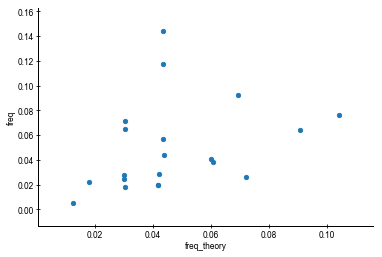

In [24]:
frequencies = ntfreq_to_aafreq(pcomp)
df_theory = pd.DataFrame.from_dict(frequencies, orient='index', columns=['freq_theory'])
dfm = df.merge(df_theory, left_index=True, right_index=True)
dfm.plot(kind='scatter', x='freq_theory', y='freq')

In [26]:
seqtk_columns = 'chr', 'length', '#A', '#C', '#G', "#T"
composition = pd.read_csv('data/composition_pfalciparum.tsv', sep='\t',
            usecols=list(range(len(seqtk_columns))),
            names=seqtk_columns, index_col=0)
pcomp = np.array([composition[seqtk_columns[i]].sum() for i in range(2, len(seqtk_columns))], dtype=np.float)
pcomp /= np.sum(pcomp)
print(pcomp)

[0.4032157  0.09637811 0.09702364 0.40338255]


In [27]:
df = counter_to_df(count_kmers_proteome(proteome_path('Malaria'), 1), norm=True)
df = df.set_index('seq')
df = df.sort_index()

In [28]:
res = projgrad.minimize(fun, np.ones(4)/4.0)
res

       x: array([0.45184414, 0.10984358, 0.14796798, 0.29034431])
     fun: 0.015193017741747774
     nit: 100
 success: True

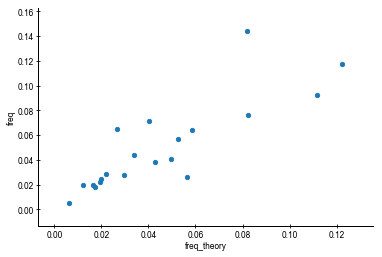

In [30]:
frequencies = ntfreq_to_aafreq(res.x)
df_theory = pd.DataFrame.from_dict(frequencies, orient='index', columns=['freq_theory'])
dfm = df.merge(df_theory, left_index=True, right_index=True)
dfm.plot(kind='scatter', x='freq_theory', y='freq')